Column names in the dataset: Index(['Unnamed: 0', 'close', 'datetime', 'exchange_code', 'high', 'low',
       'open', 'stock_code', 'volume'],
      dtype='object')
Date column found: datetime
Missing values in the dataset:
Unnamed: 0       0
close            0
exchange_code    0
high             0
low              0
open             0
stock_code       0
volume           0
Year             0
Month            0
Day              0
dtype: int64
Summary statistics of numeric columns:
          Unnamed: 0          close           high            low  \
count  671172.000000  671172.000000  671172.000000  671172.000000   
mean   335585.500000     359.690184     359.916543     359.452210   
std    193750.811773     293.803304     293.959810     293.645281   
min         0.000000      37.050000      37.050000      37.050000   
25%    167792.750000     166.250000     166.400000     166.100000   
50%    335585.500000     247.650000     247.900000     247.450000   
75%    503378.250000     551.725

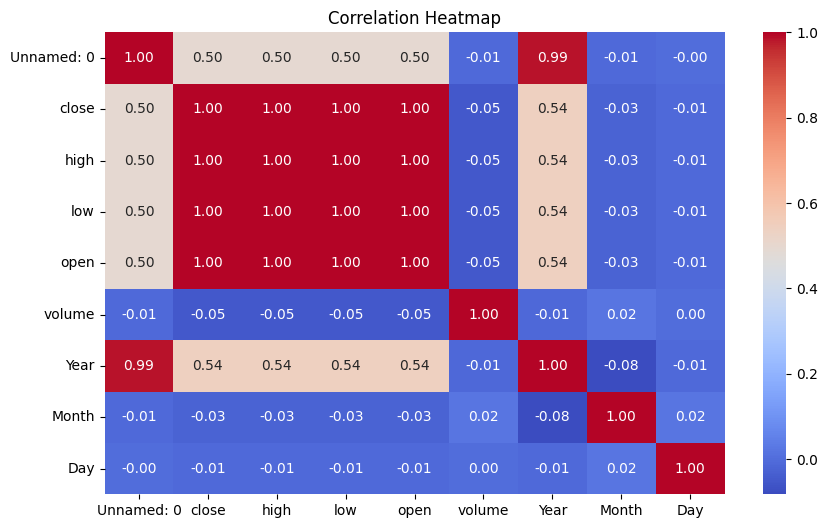

Error: 'Year' or 'Month' columns are not 1-dimensional.


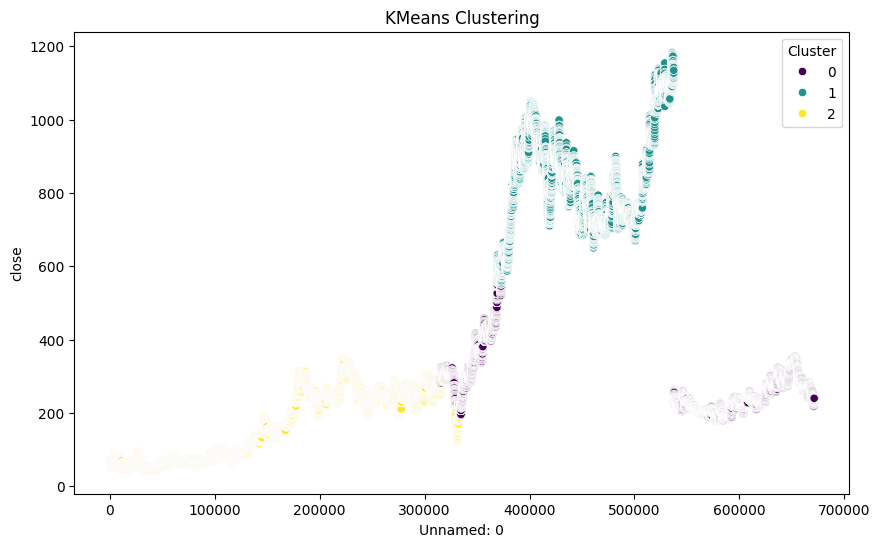

Processed dataset:
   Unnamed: 0  close exchange_code   high    low   open stock_code  volume  \
0           0  69.00           NSE  69.00  69.00  69.00     ADFFOO     100   
1           1  69.95           NSE  69.95  69.95  69.95     ADFFOO     100   
2           2  68.20           NSE  68.20  68.20  68.20     ADFFOO     591   
3           3  68.35           NSE  68.35  68.35  68.35     ADFFOO      50   
4           4  68.25           NSE  68.25  68.25  68.25     ADFFOO     100   

   Year  Month  Day  
0  2011      1    3  
1  2011      1    3  
2  2011      1    3  
3  2011      1    3  
4  2011      1    3  


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the data
url = "https://milesbusiness.in/Stocks/ADFFOODS.csv"
data = pd.read_csv(url)

# Print column names to inspect
print("Column names in the dataset:", data.columns)

# Check if a date column exists (case-insensitive)
date_column = None
for col in data.columns:
    if 'date' in col.lower():  # Check for any variation of 'date'
        date_column = col
        break

# If a date column exists, preprocess it
if date_column:
    print(f"Date column found: {date_column}")
    data[date_column] = pd.to_datetime(data[date_column])
    data['Year'] = data[date_column].dt.year
    data['Month'] = data[date_column].dt.month
    data['Day'] = data[date_column].dt.day
    data = data.drop(columns=[date_column])  # Drop the original date column
else:
    print("No date column found in the dataset.")

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Select only numeric columns for analysis
numeric_data = data.select_dtypes(include=[np.number])

# Display summary statistics
print("Summary statistics of numeric columns:")
print(numeric_data.describe())

# Correlation Analysis
# Calculate correlations
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Trend Analysis (if a date column was found and processed)
if 'Year' in data.columns and 'Month' in data.columns:
    # Combine numeric data with 'Year' and 'Month' columns for trend analysis
    trend_data = data[['Year', 'Month'] + numeric_data.columns.tolist()].copy()

    # Ensure 'Year' and 'Month' are 1-dimensional
    if trend_data['Year'].ndim == 1 and trend_data['Month'].ndim == 1:
        # Group by year and month to analyze trends
        trend_data = trend_data.groupby(['Year', 'Month'], as_index=False).mean()

        # Plot trends for a numeric column (e.g., 'Close' if it exists)
        if 'Close' in numeric_data.columns:
            plt.figure(figsize=(10, 6))
            plt.plot(trend_data['Year'].astype(str) + '-' + trend_data['Month'].astype(str), trend_data['Close'], marker='o')
            plt.title('Monthly Average Closing Price Trend')
            plt.xlabel('Year-Month')
            plt.ylabel('Closing Price')
            plt.xticks(rotation=45)
            plt.grid()
            plt.show()
    else:
        print("Error: 'Year' or 'Month' columns are not 1-dimensional.")
else:
    print("No 'Year' or 'Month' columns found for trend analysis.")

# Clustering Analysis (using KMeans)
if len(numeric_data.columns) >= 2:  # Ensure there are at least 2 numeric columns
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    numeric_data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Plot clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=numeric_data.iloc[:, 0], y=numeric_data.iloc[:, 1], hue=numeric_data['Cluster'], palette='viridis')
    plt.title('KMeans Clustering')
    plt.xlabel(numeric_data.columns[0])  # Label for the x-axis
    plt.ylabel(numeric_data.columns[1])  # Label for the y-axis
    plt.show()
else:
    print("Not enough numeric columns for clustering analysis.")

# Display the final processed dataset
print("Processed dataset:")
print(data.head())